In [1]:
'''
Template for the 4th assignment
Student: Fabian Gobet
'''

############################
# Packages
############################
import torch
import torch.nn as nn
import math

import random
import re
from nltk.tokenize.treebank import TreebankWordTokenizer
import statistics
import pickle
import os
import matplotlib.pyplot as plt

In [2]:
# Inspect movie_conversations.txt
with open('./Data/movie_conversations.txt', 'r') as conv_file:
    for i in range(5):
        line = conv_file.readline()

# Inspect movie_lines.txt
with open('./Data/movie_lines.txt', 'r') as lines_file:
    for i in range(5):
        line = lines_file.readline()


u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L194', 'L195', 'L196', 'L197']

u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L198', 'L199']

u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L200', 'L201', 'L202', 'L203']

u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L204', 'L205', 'L206']

u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L207', 'L208']

L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!

L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!

L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I hope so.

L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ She okay?

L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Let's go.



In [3]:
import random

# Create pre-pairs of sentences
pre_ref_pairs = []
with open('./Data/movie_conversations.txt', 'r') as conv_file:
    for line in conv_file:
        conversation = line.strip().split(' +++$+++ ')[-1][1:-1].replace("'", "").split(",")
        for i in range(len(conversation) - 1):
            pre_ref_pairs.append((conversation[i].strip(), conversation[i+1].strip()))

random_pre_pairs = random.sample(pre_ref_pairs, k=5)
for p in random_pre_pairs:
    print(p)

('L480140', 'L480141')
('L290355', 'L290356')
('L292356', 'L292357')
('L438249', 'L438250')
('L142281', 'L142282')


In [5]:
import random
import re
from nltk.tokenize.treebank import TreebankWordTokenizer

# Generate a dictionary of lines with the following structure:
# {line_id : {'character' : character_id, 'movie' : movie_id, 'name' : character_name, 'line' : line_text}}
lines = {}
empty_lines = 0

with open('./Data/movie_lines.txt', 'r', encoding='cp1252') as line_file:
    for line in line_file:
        line = line.split(' +++$+++ ')
        speech = re.sub('-+','',line[4].replace('\n','').replace("<u>","").replace("</u>","").lower().strip())
        if speech == '':
            empty_lines += 1
        else:
            speech = TreebankWordTokenizer().tokenize(speech)
            lines.update({line[0] : speech})

# Print number of empty lines
print('Number of empty lines: {}'.format(empty_lines))

# Print 5 random lines
random_lines = random.sample(list(lines.values()), k=5)
for line in random_lines:
    print(line)


Number of empty lines: 267
['you', 'want', 'something', '?']
['jeez', '.']
['no', 'headaches', '?']
['tomb', ',', 'shine', ',', 'surveymarker', 'spare', 'part', ',', 'take', 'your', 'choice', '.']
['yeah.', 'do', 'you', 'remember', 'the', 'last', 'time', 'you', 'talked', 'to', 'mulwray', '?']


Criei os pares de referencia.
agora tokenizar todas as sentences e construir os pares de frases

In [9]:
import random

chosen_refs = set()
pairs = []

for p in pre_ref_pairs:
    if p[0] in lines and p[1] in lines:
        pairs.append([lines[p[0]]+['<EOS>'], ['<SOS>']+lines[p[1]]+['<EOS>']])
        chosen_refs.add(p[0])
        chosen_refs.add(p[1])

random_pairs = random.sample(pairs, k=5)
for pair in random_pairs:
    print(pair)


[['give', 'us', 'this', 'day', 'our', 'daily', '...', '<EOS>'], ['<SOS>', 'you', 'ever', 'caught', 'this', 'bread', ',', 'and', 'forgive', 'our', 'syndrome', 'before', ',', 'duke', '?', '<EOS>']]
[['i', "'ll", 'think', 'you', "'ll", 'find', 'everything', 'in', 'working', 'order.', 'molly', "'s", 'just', 'having', 'a', 'little', 'fun', '.', '<EOS>'], ['<SOS>', 'i', 'do', "n't", 'call', 'this', 'fun', ',', 'pal.', 'you', "'re", 'playing', 'god', 'with', 'my', 'body', '.', '<EOS>']]
[['where', "'d", 'you', 'learn', 's.o.s.', '?', '<EOS>'], ['<SOS>', '``', 'titanic', '.', "''", '<EOS>']]
[['that', "'s", 'not', 'what', 'i', 'mean.', 'gorman', ',', 'if', 'your', 'men', 'have', 'to', 'use', 'their', 'weapons', 'in', 'there', ',', 'they', "'ll", 'rupture', 'the', 'cooling', 'system', '.', '<EOS>'], ['<SOS>', 'she', "'s", 'right', '.', '<EOS>']]
[["c'mon.", 'everyone', "'s", 'turning', 'colors.', 'kids', 'are', 'making', 'out', 'in', 'the', 'street.', 'no', 'one', "'s", 'getting', 'their', 'din

In [12]:
import statistics

# Compute the length of each sentence
sentence_lengths = [len(lines[r]) for r in chosen_refs]


# Compute the mean and standard deviation
mean_length = statistics.mean(sentence_lengths)
std_dev = statistics.stdev(sentence_lengths)

print('Mean sentence length: {}'.format(mean_length))
print('Standard deviation: {}'.format(std_dev))
print('Max sentence length: {}'.format(max(sentence_lengths)))
print('Min sentence length: {}'.format(min(sentence_lengths)))  

Mean sentence length: 13.0221915557746
Standard deviation: 13.688179362555738
Max sentence length: 664
Min sentence length: 1


In [18]:
sentences = [lines[r] for r in chosen_refs]
max_sentence = max(sentences, key=len)
print(max_sentence)

['then', 'let', "'s", 'begin', 'with', 'the', 'story', 'itself.', 'it', "'s", 'a', 'story', 'of', 'the', 'grail', 'myth', '...', 'and', 'although', 'there', 'are', 'several', 'variations', ',', 'my', 'favorite', 'begins', 'with', 'the', 'fisher', 'king', 'as', 'a', 'young', 'boy', '...', 'who', 'had', 'to', 'spend', 'a', 'night', 'alone', 'in', 'the', 'forest', 'to', 'prove', 'his', 'courage', '...', 'and', 'during', 'that', 'night', ',', 'he', 'is', 'visited', 'by', 'a', 'sacred', 'vision.', 'out', 'of', 'the', 'fire', ',', 'appears', 'the', 'holy', 'grail', 'god', "'s", 'highest', 'symbol', 'of', 'divine', 'grace.', 'and', 'a', 'voice', 'says', 'to', 'the', 'boy', ',', '``', 'you', 'shall', 'be', 'the', 'guardian', 'of', 'the', 'grail', ',', 'that', 'it', 'may', 'heal', 'the', 'hearts', 'of', 'men', "''", '...', 'but', 'the', 'boy', 'was', 'overcome', '...', 'innocent', 'and', 'foolish', ',', 'he', 'was', 'blinded', 'by', 'greater', 'visions', 'a', 'life', 'ahead', 'filled', 'with', 

In [20]:
import random
max_length = 26

pairs2 = [p for p in pairs if len(p[0])<=max_length and len(p[1])<=max_length]

print('Len of pairs: {}'.format(len(pairs)))
print('Len of pairs2: {}'.format(len(pairs2)))

random_pre_pairs = random.sample(pairs2, k=5)
for p in random_pre_pairs:
    print(p)


Len of pairs: 221282
Len of pairs2: 173020
[['jts', '...', '?', '<EOS>'], ['<SOS>', 'what', 'about', 'you', '?', 'what', 'are', 'you', 'doing', '?', 'something', 'strange', ',', 'i', 'bet', '.', '<EOS>']]
[['then', 'how', 'do', 'you', 'know', 'he', 'sells', 'guns', '?', '<EOS>'], ['<SOS>', 'he', 'told', 'me.', 'besides', ',', 'why', 'else', 'would', 'an', 'a.t.f.', 'man', 'be', 'after', 'him', '?', '<EOS>']]
[['oh', '.', '<EOS>'], ['<SOS>', 'i', "'ve", 'never', 'met', 'her.', 'my', 'mother', 'set', 'it', 'up', '.', '<EOS>']]
[['what', 'business', '?', '<EOS>'], ['<SOS>', 'staying', 'alive', '.', '<EOS>']]
[['i', "'m", 'grown', 'up', 'now.', 'i', 'have', 'to', 'leave', 'some', 'time', '.', '<EOS>'], ['<SOS>', 'of', 'course', 'you', 'do', ',', 'and', 'i', 'want', 'you', 'to', '...', 'but', 'there', "'s", 'no', 'need', 'to', 'hurry', 'it', 'along', ',', 'is', 'there', '?', '<EOS>']]


In [21]:
import pickle
import os

MY_PATH = './MyFiles/'

# Create the folder if it doesn't exist
if not os.path.exists(MY_PATH):
    os.makedirs(MY_PATH)

# Save all_words to a pickle file
with open(MY_PATH+'pairs2.pkl', 'wb') as f:
    pickle.dump(pairs2, f)

In [24]:
word_counts = {}
num_words = 0

for pair in pairs2:
    for sentence in pair:
        for word in sentence:
            if word not in word_counts:
                word_counts[word] = 1
            else:
                word_counts[word] += 1
            num_words += 1
                
print('Number of words: {}'.format(num_words))
print('Number of unique words: {}'.format(len(word_counts)))

Number of words: 3700194
Number of unique words: 54213


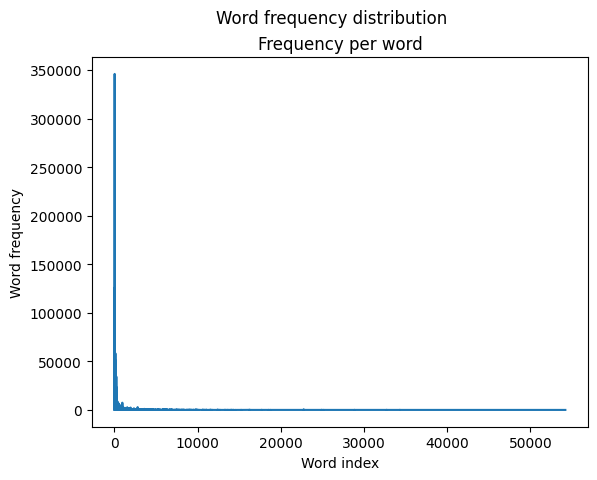

In [43]:
import matplotlib.pyplot as plt


plt.plot(range(len(word_counts)), list(word_counts.values()))
plt.xlabel('Word index')
plt.ylabel('Word frequency')
plt.suptitle('Word frequency distribution')
plt.title('Frequency per word')
plt.show()


In [44]:
import statistics

mean_value = statistics.mean(word_counts.values())
print("Mean value:", mean_value)
print("Max value:", max(word_counts.values()))
print("Min value:", min(word_counts.values()))

dict_lower_mean = {k: v for k, v in word_counts.items() if v < mean_value}
sorted_dict_lower_mean = dict(sorted(dict_lower_mean.items(), key=lambda x: x[1], reverse=True))


Mean value: 68.25289137291793
Max value: 346040
Min value: 1


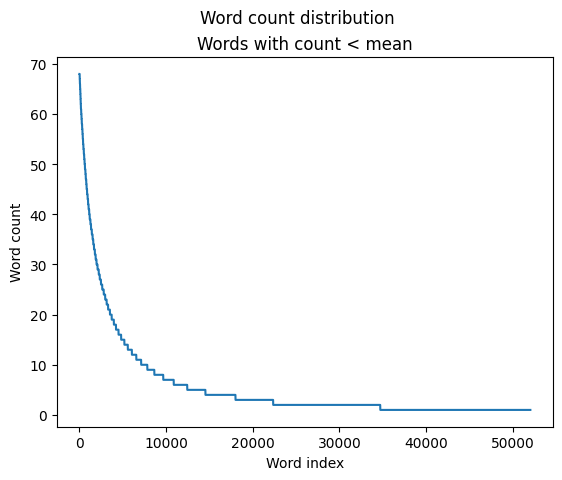

In [42]:
import matplotlib.pyplot as plt

plt.plot(range(len(sorted_dict_lower_mean)), sorted_dict_lower_mean.values())
plt.xlabel('Word index')
plt.ylabel('Word count')
plt.suptitle('Word count distribution')
plt.title('Words with count < mean')
plt.show()


In [45]:
# Frequency threshold
freq_threshold = 10

words_to_remove = [k for k, v in word_counts.items() if v < freq_threshold]
pairs3 = [p for p in pairs2 if not any(word in words_to_remove for word in p[0]) and not any(word in words_to_remove for word in p[1])]

In [54]:

print('Len of pairs2: {}'.format(len(pairs2)))
print('Len of pairs3: {}'.format(len(pairs3)))
print('Number of words removed: {} - {:.2f}%'.format(len(words_to_remove),len(words_to_remove)/len(pairs2)*100))

Len of pairs2: 173020
Len of pairs3: 104081
Number of words removed: 44210 - 25.55%


In [47]:
import pickle
import os

MY_PATH = './MyFiles/'

# Create the folder if it doesn't exist
if not os.path.exists(MY_PATH):
    os.makedirs(MY_PATH)

# Save all_words to a pickle file
with open(MY_PATH+'pairs3.pkl', 'wb') as f:
    pickle.dump(pairs3, f)

In [49]:
import pickle

with open(MY_PATH+'pairs3.pkl', 'rb') as f:
    pairs3 = pickle.load(f)

In [12]:
############################
# Classes
############################
# Vocabulary class
class Vocabulary:
    '''
    Class for dealing with our corpus
    '''

    def __init__(self, name, pairs):
        """
        Args:
            name (str): name of the language
            pairs (list): list of pairs of sentences
        """
        self.name = name
        self.word2index = {"<PAD>": 0, "<SOS>": 1, "<EOS>": 2}
        self.index2word = {0: "<PAD>", 1: "<SOS>", 2: "<EOS>"}
        self.pairs = pairs
        for p1,p2 in pairs:
            self.add_sentence(p1)
            self.add_sentence(p2)


    def add_word(self, word):
        '''
        Add a word to the vocabulary
        :param word: a string
        '''
        # TODO: add the word to the vocabulary
        if not word in self.word2index:
            self.word2index[word] = len(self.word2index)
            self.index2word[len(self.index2word)] = word


    def add_sentence(self, sentence):
        '''
        Add a sentence to the vocabulary
        :param sentence: list of strings (words)
        '''
        # TODO add the sentence to the vocabulary, this method will call the add_word method
        for word in sentence:
            self.add_word(word)


# Dataset class
class Dataset(torch.utils.data.Dataset):
    def __init__(self, vocabulary, pairs):
        # TODO We want vocabulary and pairs to be attributes of the class
        self.vocabulary = vocabulary
        self.pairs = pairs

    def __len__(self):
        # TODO how many pairs do we have?
        return len(self.pairs)

    def __getitem__(self, ix):
        # TODO returns two tensors (question, answer) of the pair at index ix
        # TODO the tensors should be of type torch.tensor and should contain integers (word indices)
        q, a = self.pairs[ix]
        q = torch.tensor([self.vocabulary.word2index[word] for word in q])
        a = torch.tensor([self.vocabulary.word2index[word] for word in a])
        return q,a
        

class PositionalEncoding(nn.Module):
    '''
    Adapted from
    https://pytorch.org/tutorials/beginner/transformer_tutorial.html
    '''
    def __init__(self, d_model, dropout=0.0, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        self.max_len = max_len

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float()
                             * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        try:
            assert x.size(0) < self.max_len
        except:
            print("The length of the sequence is bigger than the max_len of the positional encoding. Increase the max_len or provide a shorter sequence.")
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

class TransformerModel(nn.Module):
    def __init__(self, vocab_size, d_model=512, pad_id=0, encoder_layers=6, decoder_layers=6, dim_feedforward=2048, num_heads=8, dropout_p=0.1):
        super().__init__()
        # TODO add an embedding layer
        # TODO add a positional encoding layer
        # TODO add a transformer layer, you can use nn.Transformer. You can use the default values for the parameters, but what about batch_first?
        # TODO add a linear layer. Note: output should be probability distribution over the vocabulary


        # Stuff you may need
        self.vocab_size = vocab_size
        self.pad_id = pad_id
        self.num_heads = num_heads

    def create_padding_mask(self, x, pad_id=0):
        # TODO create a boolean mask for the <PAD> tokens
        pass


    def forward(self, src, tgt):
        # S is the source sequence length, T is the target sequence length, N is the batch size, E is the feature number
        # src: (N, S)
        # tgt: (N, T)
        # src_pad_mask: (N, S)
        # tgt_pad_mask: (N, T)
        # mask the future : (N * num_heads, T, T)

        src_pad_mask = self.create_padding_mask(src, self.pad_id) # (N, S)
        tgt_pad_mask = self.create_padding_mask(tgt, self.pad_id) # (N, T)

        src = self.embedding(src)
        tgt = self.embedding(tgt)

        src = self.pos_encoder(src)  # (N, S, E)
        tgt = self.pos_encoder(tgt) # (N, T, E)

        # Mask the memory
        memory_key_padding_mask = src_pad_mask  # (N, S)

        # Mask the future
        tgt_mask = self.transformer.generate_square_subsequent_mask(tgt.size(1), dtype=torch.bool).to(tgt.device) # (T, T)
        # Expand to make it N * num_heads, T, T
        tgt_mask = tgt_mask.unsqueeze(0).repeat(tgt.size(0) * self.num_heads, 1, 1) # (N, T, T)
        # Transformer
        output = self.transformer(src, tgt, tgt_mask=tgt_mask, src_key_padding_mask=src_pad_mask,
                                  tgt_key_padding_mask=tgt_pad_mask, memory_key_padding_mask=memory_key_padding_mask) # (N, T, E)
        # Linear layer
        output = self.linear(output) # (N, T, V)
        return output

In [14]:
############################
# Methods
############################

def pickle_dump(obj, PATH, name):
    '''
    Save an object to a pickle file
    :param obj: object to save
    :param path: path to the pickle file
    '''
    if not os.path.exists(PATH):
        os.makedirs(PATH)

    with open(PATH+name, 'wb') as f:
        pickle.dump(obj, f)

def pickle_load(PATH):
    '''
    Load an object from a pickle file
    :param path: path to the pickle file
    :return: the loaded object
    '''
    with open(PATH, 'rb') as f:
        obj = pickle.load(f)
    return obj

def print_random_elements(collection, k=5):
    '''
    Print k random elements from a collection
    :param collection: list of elements
    :param k: number of elements to print
    '''
    random_elements = random.sample(collection, k=k)
    for e in random_elements:
        print(e)


def create_pairs(savename1="pairs2",savename2="pairs3",max_length=26,word_frequency_discard=10,verbose=True):
    '''
    Create pairs of sentences
    :return: a list of pairs of sentences
    '''
    MY_PATH = './MyFiles/'

    if verbose:
        # Inspection of the data
        # Inspect movie_conversations.txt
        with open('./Data/movie_conversations.txt', 'r') as conv_file:
            for i in range(5):
                line = conv_file.readline()

        # Inspect movie_lines.txt
        with open('./Data/movie_lines.txt', 'r') as lines_file:
            for i in range(5):
                line = lines_file.readline()
    

    # Create pre-pairs of sentences
    ref_pairs = []
    with open('./Data/movie_conversations.txt', 'r') as conv_file:
        for line in conv_file:
            conversation = line.strip().split(' +++$+++ ')[-1][1:-1].replace("'", "").split(",")
            for i in range(len(conversation) - 1):
                ref_pairs.append((conversation[i].strip(), conversation[i+1].strip()))

    if verbose:
        # Print 5 random pairs
        print_random_elements(ref_pairs)

    # Generate a dictionary of lines with the following structure:
    # {line_id : line_text}
    # Filter out the empty lines and count them
    lines = {}
    empty_lines = 0

    with open('./Data/movie_lines.txt', 'r', encoding='cp1252') as line_file:
        for line in line_file:
            line = line.split(' +++$+++ ')
            speech = re.sub('-+','',line[4].replace('\n','').replace("<u>","").replace("</u>","").lower().strip())
            if speech == '':
                empty_lines += 1
            else:
                speech = TreebankWordTokenizer().tokenize(speech)
                lines.update({line[0] : speech})

    if verbose:
        # Print number of empty lines
        print('Number of empty lines: {}'.format(empty_lines))

        # Print 5 random lines
        print_random_elements(list(lines.values()))

    # Tokenize the data
    chosen_refs = set()
    pairs = []

    for p in ref_pairs:
        if p[0] in lines and p[1] in lines:
            pairs.append([lines[p[0]]+['<EOS>'], ['<SOS>']+lines[p[1]]+['<EOS>']])
            chosen_refs.add(p[0])
            chosen_refs.add(p[1])

    if verbose:
        # Print 5 random pairs
        print_random_elements(pairs)

        # Filter out the sentences that are too long

        # Compute the length of each sentence
        # Compute the mean and standard deviation for sentence lengths
        sentence_lengths = [len(lines[r]) for r in chosen_refs]

        # Compute the mean and standard deviation
        mean_length = statistics.mean(sentence_lengths)
        std_dev = statistics.stdev(sentence_lengths)

        print('Mean sentence length: {}'.format(mean_length))
        print('Standard deviation: {}'.format(std_dev))
        print('Max sentence length: {}'.format(max(sentence_lengths)))
        print('Min sentence length: {}'.format(min(sentence_lengths)))

    # Create a list of pairs of sentences shorter tan max_length
    max_length = 26
    pairs2 = [p for p in pairs if len(p[0])<=max_length and len(p[1])<=max_length]

    if verbose:
        print('Len of pairs: {}'.format(len(pairs)))
        print('Len of pairs2: {}'.format(len(pairs2)))

        # Print 5 random pairs
        print_random_elements(pairs2)

    pickle_dump(pairs2, MY_PATH,savename1+".pkl")


    # Filter out the words that are too rare
    # Compute the frequency of each word
    word_counts = {}
    num_words = 0

    for pair in pairs2:
        for sentence in pair:
            for word in sentence:
                if word not in word_counts:
                    word_counts[word] = 1
                else:
                    word_counts[word] += 1
                num_words += 1

    if verbose:    
        print('Number of words: {}'.format(num_words))
        print('Number of unique words: {}'.format(len(word_counts)))

        plt.plot(range(len(word_counts)), list(word_counts.values()))
        plt.xlabel('Word index')
        plt.ylabel('Word frequency')
        plt.suptitle('Word frequency distribution')
        plt.title('Frequency per word')
        plt.show()

        # Compute the mean and standard deviation for word counts
        mean_value = statistics.mean(word_counts.values())
        print("Mean value:", mean_value)
        print("Max value:", max(word_counts.values()))
        print("Min value:", min(word_counts.values()))

        # Plot the distribution of word counts < mean
        dict_lower_mean = {k: v for k, v in word_counts.items() if v < mean_value}
        sorted_dict_lower_mean = dict(sorted(dict_lower_mean.items(), key=lambda x: x[1], reverse=True))

        plt.plot(range(len(sorted_dict_lower_mean)), sorted_dict_lower_mean.values())
        plt.xlabel('Word index')
        plt.ylabel('Word count')
        plt.suptitle('Word count distribution')
        plt.title('Words with count < mean')
        plt.show()

    # Frequency threshold and filter out the words that are too rare
    freq_threshold = word_frequency_discard
    words_to_remove = [k for k, v in word_counts.items() if v < freq_threshold]
    pairs3 = [p for p in pairs2 if not any(word in words_to_remove for word in p[0]) and not any(word in words_to_remove for word in p[1])]

    if verbose:
        print('Len of pairs2: {}'.format(len(pairs2)))
        print('Len of pairs3: {}'.format(len(pairs3)))
        print('Number of words removed: {} - {:.2f}%'.format(len(words_to_remove),len(words_to_remove)/len(pairs2)*100))
    
    # Save the pairs to a pickle file
   

    pickle_dump(pairs3, MY_PATH,savename2+".pkl")

    return pairs3

('L269591', 'L269592')
('L516221', 'L516222')
('L34553', 'L34554')
('L553010', 'L553011')
('L483714', 'L483715')
Number of empty lines: 267
['i', 'am', 'the', 'wolf', ',', 'cunning', 'and', 'swift', '!']
['it', "'s", 'the', 'damn', 'money', 'men.', 'you', 'never', 'know', 'who', "'s", 'a', 'windbag', ',', 'and', 'who', "'s", 'got', 'the', 'goods.', 'and', 'then', 'they', 'all', 'think', 'they', "'re", 'a', 'director', '...']
['sure', 'it', "wasn't.", 'hey', ',', 'anybody', 'else', 'here', 'make', 'their', 'living', 'with', "thrills'n'chills", 'for', 'the', 'kiddies', '?', 'do', "n't", 'raise', 'your', 'hands', 'all', 'at', 'once', '.']
['the', 'elders', ',', 'mon', '...']
['thank', 'you', '.']
[['actually', ',', 'it', "'s", 'mary', 'brooks', 'now', '.', '<EOS>'], ['<SOS>', 'oh', '...', 'are', 'you', '...', '?', '<EOS>']]
[['released', 'december', 'one.', 'he', 'and', 'his', 'wife', 'moved', 'first', 'to', 'modesto', ',', 'then', 'coalinga', ',', 'california', 'wherever', 'that', 'is', 

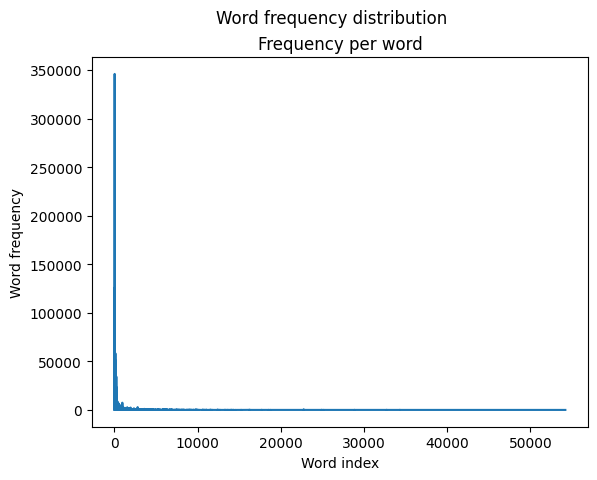

Mean value: 68.25289137291793
Max value: 346040
Min value: 1


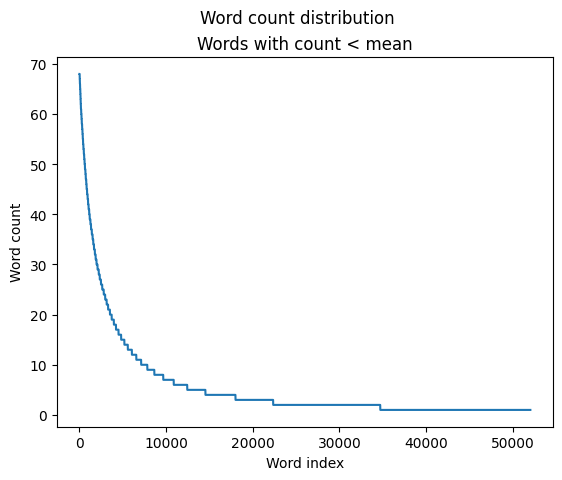

Len of pairs2: 173020
Len of pairs3: 104081
Number of words removed: 44210 - 25.55%


In [15]:
if __name__ == "__main__":
    # !!! Don't change the seed !!!
    torch.manual_seed(42)
    # !!!!!!

    # Download the data

    # SAVE and put the code above into a function that you will call if you need to generate something slightly different
    pairs3_2 = create_pairs(savename1="pairs2_test",savename2="pairs3_test",max_length=26,word_frequency_discard=10,verbose=True)

    # Training loop (Consider writing a function for this/two separate functions for training and validation)

    # Evaluation by feeding the model with one input sentence at a time

    pass

In [ ]:
# Inspection of the data
# Inspect movie_conversations.txt
with open('./Data/movie_conversations.txt', 'r') as conv_file:
    for i in range(5):
        line = conv_file.readline()

# Inspect movie_lines.txt
with open('./Data/movie_lines.txt', 'r') as lines_file:
    for i in range(5):
        line = lines_file.readline()

# Create pre-pairs of sentences
ref_pairs = []
with open('./Data/movie_conversations.txt', 'r') as conv_file:
    for line in conv_file:
        conversation = line.strip().split(' +++$+++ ')[-1][1:-1].replace("'", "").split(",")
        for i in range(len(conversation) - 1):
            ref_pairs.append((conversation[i].strip(), conversation[i+1].strip()))

# Print 5 random pairs
print_random_elements(ref_pairs)

# Generate a dictionary of lines with the following structure:
# {line_id : line_text}
# Filter out the empty lines and count them
lines = {}
empty_lines = 0

with open('./Data/movie_lines.txt', 'r', encoding='cp1252') as line_file:
    for line in line_file:
        line = line.split(' +++$+++ ')
        speech = re.sub('-+','',line[4].replace('\n','').replace("<u>","").replace("</u>","").lower().strip())
        if speech == '':
            empty_lines += 1
        else:
            speech = TreebankWordTokenizer().tokenize(speech)
            lines.update({line[0] : speech})

# Print number of empty lines
print('Number of empty lines: {}'.format(empty_lines))

# Print 5 random lines
print_random_elements(lines.values())

# Tokenize the data
chosen_refs = set()
pairs = []

for p in ref_pairs:
    if p[0] in lines and p[1] in lines:
        pairs.append([lines[p[0]]+['<EOS>'], ['<SOS>']+lines[p[1]]+['<EOS>']])
        chosen_refs.add(p[0])
        chosen_refs.add(p[1])

# Print 5 random pairs
print_random_elements(pairs)

# Filter out the sentences that are too long

# Compute the length of each sentence
# Compute the mean and standard deviation for sentence lengths
sentence_lengths = [len(lines[r]) for r in chosen_refs]

# Compute the mean and standard deviation
mean_length = statistics.mean(sentence_lengths)
std_dev = statistics.stdev(sentence_lengths)

print('Mean sentence length: {}'.format(mean_length))
print('Standard deviation: {}'.format(std_dev))
print('Max sentence length: {}'.format(max(sentence_lengths)))
print('Min sentence length: {}'.format(min(sentence_lengths)))

# Create a list of pairs of sentences shorter tan max_length
max_length = 26
pairs2 = [p for p in pairs if len(p[0])<=max_length and len(p[1])<=max_length]

print('Len of pairs: {}'.format(len(pairs)))
print('Len of pairs2: {}'.format(len(pairs2)))

# Print 5 random pairs
print_random_elements(pairs2)

# Save the pairs to a pickle file
MY_PATH = './MyFiles/'
pickle_dump(pairs2, MY_PATH,'pairs2.pkl') 

# Filter out the words that are too rare
# Compute the frequency of each word
word_counts = {}
num_words = 0

for pair in pairs2:
    for sentence in pair:
        for word in sentence:
            if word not in word_counts:
                word_counts[word] = 1
            else:
                word_counts[word] += 1
            num_words += 1
                
print('Number of words: {}'.format(num_words))
print('Number of unique words: {}'.format(len(word_counts)))

plt.plot(range(len(word_counts)), list(word_counts.values()))
plt.xlabel('Word index')
plt.ylabel('Word frequency')
plt.suptitle('Word frequency distribution')
plt.title('Frequency per word')
plt.show()

# Compute the mean and standard deviation for word counts
mean_value = statistics.mean(word_counts.values())
print("Mean value:", mean_value)
print("Max value:", max(word_counts.values()))
print("Min value:", min(word_counts.values()))

# Plot the distribution of word counts < mean
dict_lower_mean = {k: v for k, v in word_counts.items() if v < mean_value}
sorted_dict_lower_mean = dict(sorted(dict_lower_mean.items(), key=lambda x: x[1], reverse=True))

plt.plot(range(len(sorted_dict_lower_mean)), sorted_dict_lower_mean.values())
plt.xlabel('Word index')
plt.ylabel('Word count')
plt.suptitle('Word count distribution')
plt.title('Words with count < mean')
plt.show()

# Frequency threshold and filter out the words that are too rare
freq_threshold = 10
words_to_remove = [k for k, v in word_counts.items() if v < freq_threshold]
pairs3 = [p for p in pairs2 if not any(word in words_to_remove for word in p[0]) and not any(word in words_to_remove for word in p[1])]

print('Len of pairs2: {}'.format(len(pairs2)))
print('Len of pairs3: {}'.format(len(pairs3)))
print('Number of words removed: {} - {:.2f}%'.format(len(words_to_remove),len(words_to_remove)/len(pairs2)*100))

pickle_dump(pairs3, MY_PATH+'pairs3.pkl')

# SAVE and put the code above into a function that you will call if you need to generate something slightly different

# Training loop (Consider writing a function for this/two separate functions for training and validation)

# Evaluation by feeding the model with one input sentence at a time

pass